In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
#impoerting the necessary libraries

In [4]:
transactions = pd.read_excel(r"C:\Users\hp\Desktop\KPMG\kpmg.xlsx", sheet_name='Transactions')
new_customer_lists = pd.read_excel(r"C:\Users\hp\Desktop\KPMG\kpmg.xlsx", sheet_name='NewCustomerList')
customer_demographic = pd.read_excel(r"C:\Users\hp\Desktop\KPMG\kpmg.xlsx", sheet_name='CustomerDemographic')
customer_add = pd.read_excel(r"C:\Users\hp\Desktop\KPMG\kpmg.xlsx", sheet_name='CustomerAddress')
#reading data from files

In [5]:
transactions.head()
#prints the first five rows

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
transactions.tail()
#prints the last five rows

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334.0


In [7]:
transactions.shape
#total rows and columns

(20000, 13)

In [8]:
transactions.describe()
#Brief description of the dataset

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [12]:
transactions.dtypes
#the datatype for product_first_sold_date is float and it should be stored as date.

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [13]:
transactions.info()
#displays concise summary of the df
#we can see online_order,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [14]:
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='s')
#converting product_first_sold_date column from float to datetime

In [15]:
transactions.dtypes
#after changing the datatype of product_first_sold_date

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

In [16]:
transactions.head()
#first five rows

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46


In [17]:
transactions['product_first_sold_date'].head()
#now the last column shows correct values

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [20]:
transactions.isnull().sum()
#the number of null values in our dataset


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
#WE CAN EITHER CALCULATE THE MEAN OF THE FOLLOWING COLUMN AND THEN SUBSTITUTE THE MISSING VALUES WITH MEAN,MEDIAN OR IF THE DATA IS NOT SO IMPORTANT WE CAN JUST DROP THE COLUMN

In [22]:
transactions.duplicated().sum()
#no duplicate data in the dataset

0

In [24]:
transactions.nunique()
#total unique datas in each column

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [26]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [51]:
transactions['transaction_date'].value_counts().max
#on 2017-08-18 we had maximum transactions

<bound method Series.max of 2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
2017-07-09    70
2017-10-16    70
2017-12-06    69
2017-01-15    69
2017-03-18    69
2017-12-16    68
2017-05-17    68
2017-11-06    68
2017-08-21    68
2017-04-09    67
2017-08-14    67
2017-11-14    67
2017-01-10    67
2017-10-27    67
2017-04-27    67
2017-10-24    66
2017-05-01    66
2017-01-18    66
2017-11-15    66
2017-03-08    66
2017-02-03    66
2017-11-16    66
2017-06-04    65
2017-10-23    65
2017-11-20    65
              ..
2017-11-26    45
2017-07-31    45
2017-07-04    45
2017-08-10    45
2017-04-14    45
2017-12-08    44
2017-06-06    44
2017-07-01    44
2017-10-26    44
2017-01-28    44
2017-03-07    44
2017-04-03    44
2017-04-23    43
2017-01-29    43
2017-05-27    43
2017-03-27    43
2017-03-06    43
2017-09-01    43
2017-03-04    42
2017-06-14    41
2017-11-24    41
2017-06-28    41
2017-05-16    40
2017-03-31    39
2017-08-29    38
2017-01-12    38
201

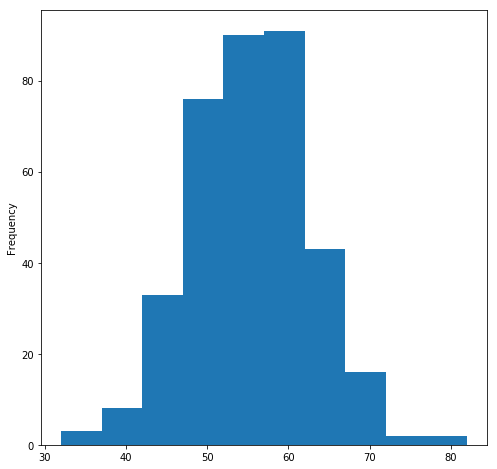

In [49]:
transactions['transaction_date'].value_counts().plot(kind='hist',figsize=(8,8))

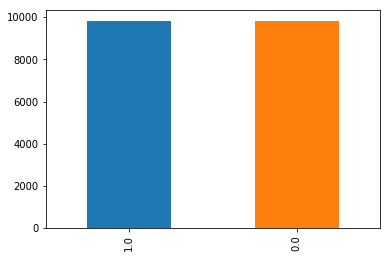

In [40]:
transactions['online_order'].value_counts().plot(kind='bar')
#1 is true and 0 is false


In [41]:

#from the above histogram its clear that almost 50% people like to order offline and 50% like to order online

In [43]:
transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

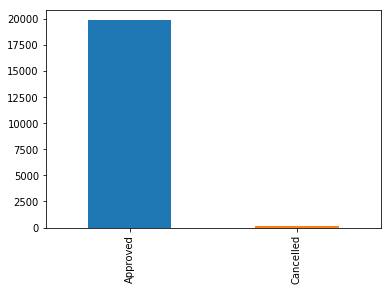

In [44]:
transactions['order_status'].value_counts().plot(kind='bar')
#only a few orders were cancelled

In [52]:
transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

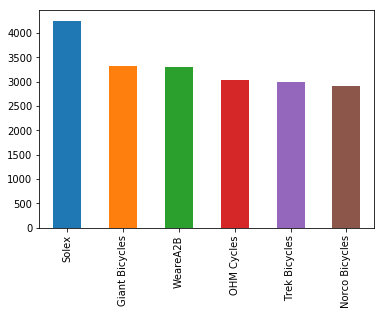

In [55]:
transactions['brand'].value_counts().plot(kind='bar')
#solex has the most sales(4253)

In [56]:
transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

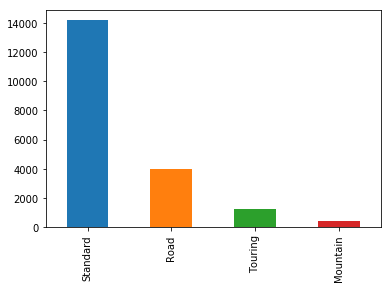

In [57]:
transactions['product_line'].value_counts().plot(kind='bar')

In [58]:
transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

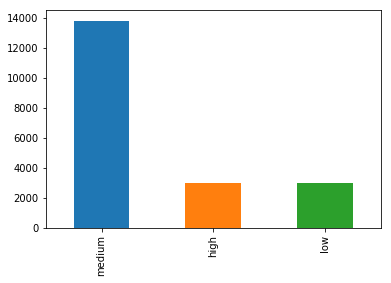

In [59]:
transactions['product_class'].value_counts().plot(kind='bar')

In [60]:
transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

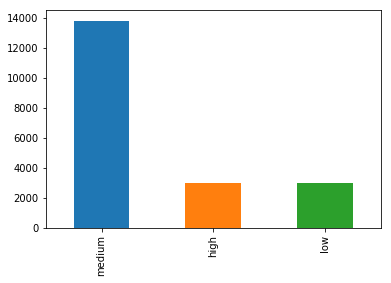

In [61]:
transactions['product_class'].value_counts().plot(kind='bar')

In [76]:
transactions['list_price'].describe()
#min list price is 12.01000 and max list price is 2091.4700


count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

In [77]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [78]:
transactions['standard_cost'].describe()
#The min standard cost is 7.21000 and max is 1759.85000 dollars

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [86]:
new_customer_lists.head()
#The given data is complex so we need to remove those col names and put ours

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.93,1.1625,1.453125,1.235156,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.40,0.4000,0.500000,0.425000,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.82,0.8200,0.820000,0.820000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.10,1.3750,1.375000,1.375000,4.0,4,1.70312


In [87]:
new_customer_lists.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"first_name"}, inplace = True)

In [93]:
new_customer_lists.rename(columns={"Unnamed: 1":"last_name",
                   "Unnamed: 2":"gender",
                   "Unnamed: 3":"past_3_years_bike_related_purchases",
                   "Unnamed: 4":"DOB",
                   "Unnamed: 5":"job_title",
                   "Unnamed: 6":"job_industry_category",
                   "Unnamed: 7":"wealth_segment",
                   "Unnamed: 8":"deceased_indicator",
                   "Unnamed: 9":"owns_car",
                   "Unnamed: 10":"tenure",
                   "Unnamed: 11":"address",
                   "Unnamed: 12":"postcode",
                   "Unnamed: 13":"state",
                   "Unnamed: 14":"country",
                   "Unnamed: 15":"property_valuation",
                   "Unnamed: 21":"Rank",
                   "Unnamed: 22":"Value"}, inplace = True)

In [94]:
new_customer_lists.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [95]:
new_customer_lists.head()
#After renaming the columns we see there are 5 extra columns which we dont need at all so we will drop those .

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.93,1.1625,1.453125,1.235156,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.40,0.4000,0.500000,0.425000,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.82,0.8200,0.820000,0.820000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.10,1.3750,1.375000,1.375000,4.0,4,1.70312


In [97]:
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
new_customer_lists = new_customer_lists.drop(cols, axis=1)
#Dropping the unnecessary columns

In [98]:
new_customer_lists.head()
#first row is of no use so we will drop that

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312


In [99]:
new_customer_lists=new_customer_lists.iloc[1:]

In [100]:
new_customer_lists.head()
#proper dataset

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312


In [103]:
new_customer_lists.info()
#Concise summary of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null object
DOB                                    983 non-null object
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null object
address                                1000 non-null object
postcode                               1000 non-null object
state                                  1000 non-null object
country                                1000 non-null obje

In [104]:
new_customer_lists.shape
#Total rows and columns

(1000, 18)

In [105]:
new_customer_lists.dtypes

first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
owns_car                               object
tenure                                 object
address                                object
postcode                               object
state                                  object
country                                object
property_valuation                     object
Rank                                   object
Value                                  object
dtype: object

In [106]:
#The datatypes are not proper for few columns

In [108]:
new_customer_lists['DOB'] = pd.to_datetime(new_customer_lists['DOB'])

In [112]:
new_customer_lists['past_3_years_bike_related_purchases '] = pd.to_datetime(new_customer_lists['past_3_years_bike_related_purchases '])

dtype('O')

In [114]:
new_customer_lists['past_3_years_bike_related_purchases'] = new_customer_lists['past_3_years_bike_related_purchases'].astype(str).astype(int)

In [116]:
new_customer_lists['past_3_years_bike_related_purchases'].dtypes

dtype('int32')

In [117]:
new_customer_lists['tenure'] = new_customer_lists['tenure'].astype(str).astype(int)

In [118]:
new_customer_lists['postcode'] = new_customer_lists['postcode'].astype(str).astype(int)

In [119]:
new_customer_lists['property_valuation'] = new_customer_lists['property_valuation'].astype(str).astype(int)

In [120]:
new_customer_lists['Rank'] = new_customer_lists['Rank'].astype(str).astype(int)

In [121]:
new_customer_lists['Value'] = new_customer_lists['Value'].astype(str).astype(float)

In [122]:
new_customer_lists.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int32
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int32
address                                        object
postcode                                        int32
state                                          object
country                                        object
property_valuation                              int32
Rank                                            int32
Value                                         float64
dtype: object

In [126]:
#After correcting the datatypes of columns

In [140]:
print(new_customer_lists.isnull().sum())
print("Total Null Values in Dataset:",new_customer_lists.isnull().sum().sum())
#There are null values in some columns

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64
Total Null Values in Dataset: 317


In [127]:
#we can either drop the column if its not necessary or we can take the mean,medianor mode of the column and as per requirement put these values in blank spaces

In [130]:
new_customer_lists.duplicated().sum()
#No duplicate value in dataset

0

In [136]:
print(new_customer_lists.nunique())
print("Total unique values in dataset:",new_customer_lists.nunique().sum())

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64
Total unique values in dataset: 5370


In [137]:
#Total unique values in Dataset for each column

In [142]:
new_customer_lists.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

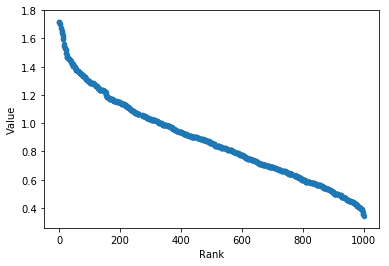

In [152]:

new_customer_lists.plot(x='Rank',y='Value',kind='scatter')
#Lower the rank Higher the value and vica versa

In [153]:
new_customer_lists['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [158]:
new_customer_lists['gender']=new_customer_lists['gender'].str.replace('U','Unspecified')
#Replacing U with UNspecified for better understanding

In [159]:
new_customer_lists['gender'].value_counts()

Female         513
Male           470
Unspecified     17
Name: gender, dtype: int64

In [161]:
new_customer_lists['job_title'].value_counts()

Associate Professor                     15
Software Consultant                     14
Environmental Tech                      14
Chief Design Engineer                   13
VP Sales                                12
Senior Sales Associate                  12
Cost Accountant                         12
Assistant Media Planner                 12
Assistant Manager                       12
Environmental Specialist                11
Nurse Practicioner                      11
VP Marketing                            11
Social Worker                           11
Junior Executive                        11
Account Executive                       11
Payment Adjustment Coordinator          11
VP Quality Control                      11
Human Resources Manager                 10
Financial Analyst                       10
Product Engineer                        10
Business Systems Development Analyst    10
Chemical Engineer                       10
Dental Hygienist                        10
Structural 

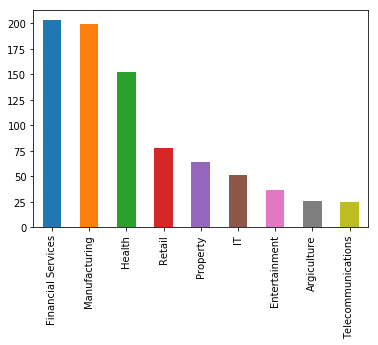

In [163]:
new_customer_lists['job_industry_category'].value_counts().plot(kind='bar')
#Most of the customers are from financial services and manufacturing

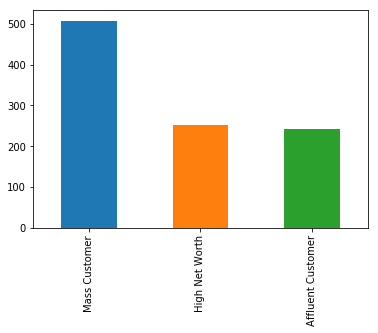

In [165]:
new_customer_lists['wealth_segment'].value_counts().plot(kind='bar')

In [167]:
new_customer_lists['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

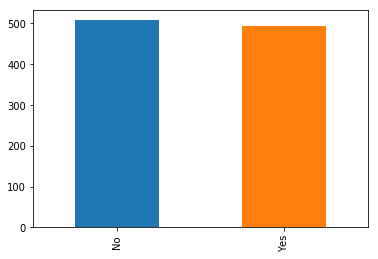

In [169]:
new_customer_lists['owns_car'].value_counts().plot(kind='bar')

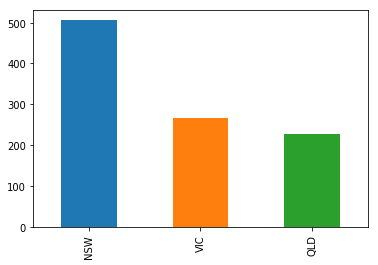

In [172]:
new_customer_lists['state'].value_counts().plot(kind='bar')
#Majority of customers are from New South Wales

In [171]:
new_customer_lists['country'].value_counts()

Australia    1000
Name: country, dtype: int64

In [173]:
new_customer_lists.describe()
#Useful statistics of different columns

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [177]:
new_customer_lists['DOB'].describe()
#Includes the first and lasr date of birth

count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

In [178]:
customer_demographic.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [179]:
customer_demographic.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)

In [180]:
customer_demographic.rename(columns={"Unnamed: 1":"first_name",
                   "Unnamed: 2":"last_name",
                   "Unnamed: 3":"gender",
                   "Unnamed: 4":"past_3_years_bike_related_purchases",
                   "Unnamed: 5":"DOB",
                   "Unnamed: 6":"job_title"}, inplace = True)
customer_demographic.rename(columns={"Unnamed: 7":"job_industry_category",
                   "Unnamed: 8":"wealth_segement",
                   "Unnamed: 9":"deceased_indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                   "Unnamed: 12":"tenure"}, inplace = True)

In [181]:
customer_demographic=customer_demographic.iloc[1:]

In [182]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segement,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [183]:
customer_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segement                          0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [184]:
print("Total Null Values in Dataset:",customer_demographic.isnull().sum().sum())

Total Null Values in Dataset: 1763


In [185]:
customer_demographic.shape

(4000, 13)

In [186]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
customer_id                            4000 non-null object
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null object
DOB                                    3913 non-null object
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segement                        4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null object
dtypes: object(13)
memory usage: 406.3+ KB


In [187]:
customer_demographic['customer_id']=customer_demographic['customer_id'].astype(str).astype(int)

In [188]:
customer_demographic['customer_id'].dtypes

dtype('int32')

In [189]:
customer_demographic['past_3_years_bike_related_purchases']=customer_demographic['past_3_years_bike_related_purchases'].astype(str).astype(int)

In [193]:
customer_demographic['DOB'] = pd.to_datetime(customer_demographic['DOB'])

In [195]:
customer_demographic['tenure']=customer_demographic['tenure'].astype(str).astype(float)

In [196]:
customer_demographic.info()
#changing the datatypes of columns to correct types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
customer_id                            4000 non-null int32
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int32
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segement                        4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(2), object(9)
memory usage: 375.1+ KB


In [198]:
customer_demographic['default']

1                                                      "'
2                            <script>alert('hi')</script>
3                                     2018-02-01 00:00:00
4       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
5                                                     NIL
6                                                ðµ ð ð ð
7                                               â°â´âµâââ
8                                 (â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)
9                                                     0/0
10                                                   ð©ð½
11                                     ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ
12                                                    nil
13                                                   -100
14                                                 â°â´âµ
15                                                      ð
16      1000000000000000049861653971908893017010268485...
17                       ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾
18            

In [199]:
#VALUES IN DEFAULT COLUMN ARE NOT CORRECT AND WE SHOULD DROP THEM

In [200]:
customer_demographic = customer_demographic.drop('default', axis=1)
#Dropping the default column

In [201]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segement,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
4,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [202]:
customer_demographic.shape

(4000, 12)

In [205]:
customer_demographic.duplicated().sum()
#No duplicate values in dataset

0

In [213]:
customer_demographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segement                           3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [207]:
customer_demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
F            1
Femal        1
Name: gender, dtype: int64

In [208]:
#gender column has inconsistent values and it needs to be changed

In [211]:
customer_demographic['gender'] = customer_demographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')
#Replacing inconsistent values with proper

In [212]:
customer_demographic['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [215]:
customer_demographic['DOB'].describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [216]:
#The first DOB 1843-12-21 is wrong and it should be dropped

In [217]:
customer_demographic['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Recruiting Manager                      41
Legal Assistant                         41
General Manager                         40
Associate Professor                     39
Structural Engineer                     39
Sales Representative                    38
Desktop Support Technician              38
Junior Executive                        38
Technical Writer                        37
Chemical Engineer                       37
Executive Secretary                     37
Dental Hygienist                        37
Senior Financial Analyst                37
Cost Accountant                         36
Assistant Professor                     36
Product Engineer                        36
Senior Developer                        36
Registered Nurse                        36
Food Chemist                            35
VP Product 

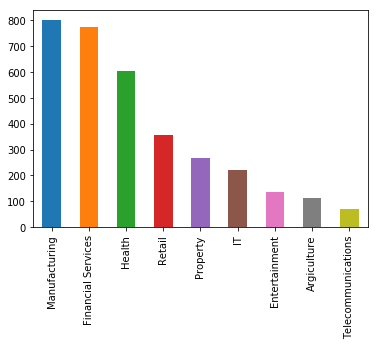

In [219]:
customer_demographic['job_industry_category'].value_counts().plot(kind='bar')

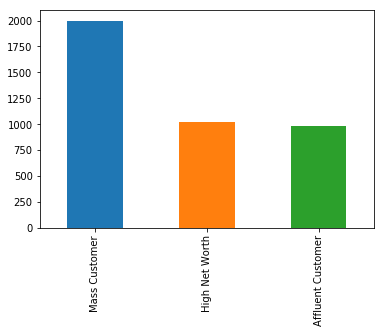

In [221]:
customer_demographic['wealth_segement'].value_counts().plot(kind='bar')

In [222]:
customer_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segement', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [224]:
customer_demographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

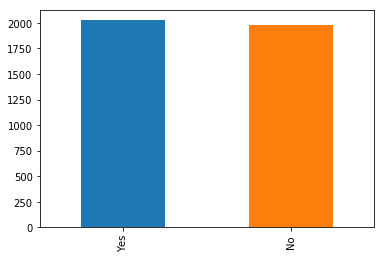

In [226]:
customer_demographic['owns_car'].value_counts().plot(kind='bar')

In [229]:
customer_demographic['tenure'].describe()

count    3913.000000
mean       10.657041
std         5.660146
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

In [230]:
customer_add.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [231]:
customer_add.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)

In [233]:
customer_add.rename(columns={"Unnamed: 1":"address",
                   "Unnamed: 2":"postcode",
                   "Unnamed: 3":"state",
                   "Unnamed: 4":"country",
                   "Unnamed: 5":"property_valuation"}, inplace = True)

In [234]:
customer_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [235]:
customer_add=customer_add.iloc[1:]

In [236]:
customer_add.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [237]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
customer_id           3999 non-null object
address               3999 non-null object
postcode              3999 non-null object
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null object
dtypes: object(6)
memory usage: 187.5+ KB


In [238]:
customer_add['customer_id']=customer_add['customer_id'].astype(str).astype(int)

In [239]:
customer_add['postcode']=customer_add['postcode'].astype(str).astype(int)

In [240]:
customer_add['property_valuation']=customer_add['property_valuation'].astype(str).astype(int)

In [241]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
customer_id           3999 non-null int32
address               3999 non-null object
postcode              3999 non-null int32
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int32
dtypes: int32(3), object(3)
memory usage: 140.7+ KB


In [242]:
#After changing column values to correct Datatypes

In [243]:
customer_add.shape
#Total rows and columns

(3999, 6)

In [244]:
customer_add.isnull().sum()
#No Null Values in Dataset

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [246]:
customer_add.duplicated().sum()
#NO Unique Values

0

In [247]:
customer_add.nunique()
#Unique Values in each column

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [248]:
customer_add['state'].value_counts()
#There are inconsistent values which needs to be changed

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [249]:
customer_add['state'] = customer_add['state'].replace('New South Wales','NSW').replace('Victoria','VIC')

In [250]:
customer_add['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [251]:
customer_add.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [254]:
customer_add['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [256]:
customer_add['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64